In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from scipy import stats

In [46]:
#Loading Dataset and distributing it onto data and targets
dataset = fetch_california_housing()
print(dataset.feature_names)

X = dataset.data
y = dataset.target

dataset = pd.DataFrame(X, columns=dataset.feature_names)
dataset["MedHouseVal"] = y

#Cleaning Data
z_scores = stats.zscore(dataset)
df_cleaned = dataset[(abs(z_scores) < 3).all(axis=1)]

#Redefining X and y after cleaning out the outliners
X_cleaned = df_cleaned.drop(columns=["MedHouseVal"]).values
y_cleaned = df_cleaned["MedHouseVal"].values

#Identifying the Shape of the Datasets with Features
print(X_cleaned.shape, y_cleaned.shape)
print(f"all cleaned \n {X_cleaned}")
print(f"all \n {X}")



['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(19794, 8) (19794,)
all cleaned 
 [[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
all 
 [[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7      

In [47]:
# 7. Output the shape of the original and cleaned datasets
original_size = dataset.shape[0]
cleaned_size = df_cleaned.shape[0]
print(original_size)
print(cleaned_size)

20640
19794


In [49]:
#Each value corresponds to the average house value in units of 100,000 for "MedHouseVal"
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [50]:
df_cleaned

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [52]:
print(dataset.corr())
print(df_cleaned.corr())

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

Text(0.5, 1.0, 'Average Rooms vs. Median House Value')

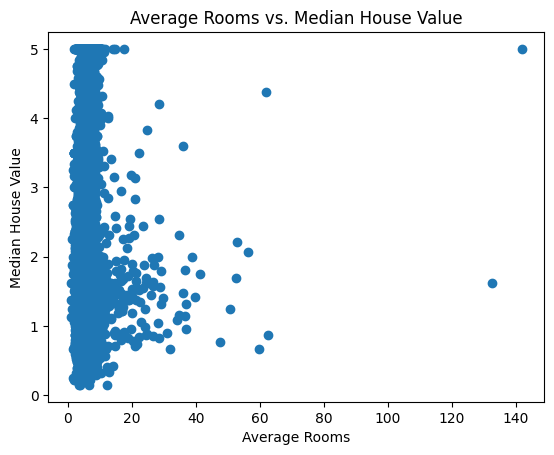

In [77]:
plt.scatter(dataset["AveRooms"] ,dataset["MedHouseVal"])
#set the labels and title
plt.xlabel("Average Rooms")
plt.ylabel("Median House Value")
plt.title("Average Rooms vs. Median House Value")

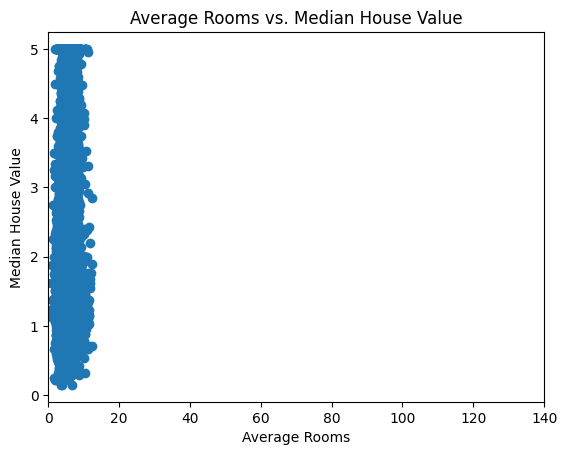

In [76]:
plt.scatter(df_cleaned["AveRooms"], df_cleaned["MedHouseVal"])
plt.xlim(0,140)
#set the labels and title
plt.xlabel("Average Rooms")
plt.ylabel("Median House Value")
plt.title("Average Rooms vs. Median House Value")
plt.show()

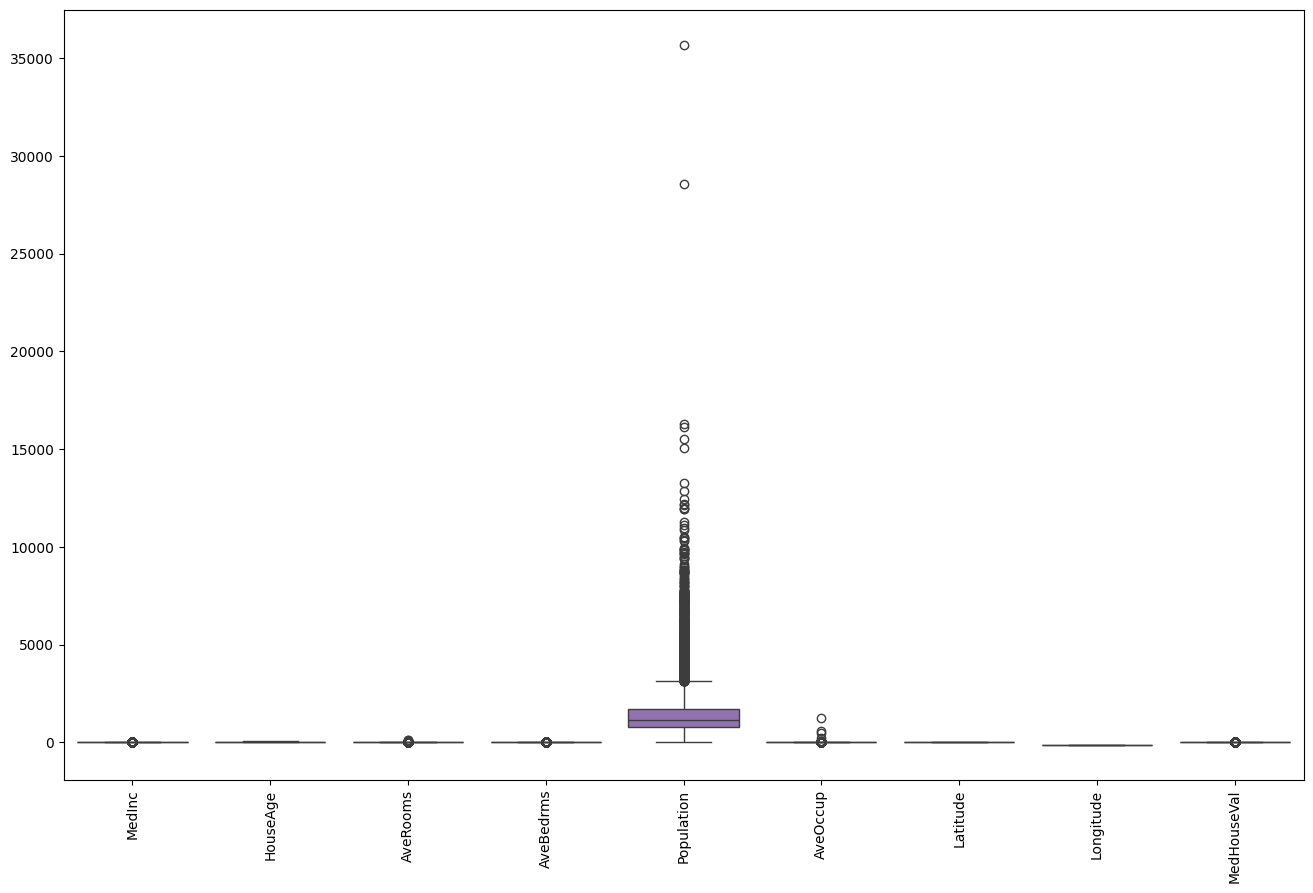

In [55]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=dataset)
plt.xticks(rotation=90)
plt.show()

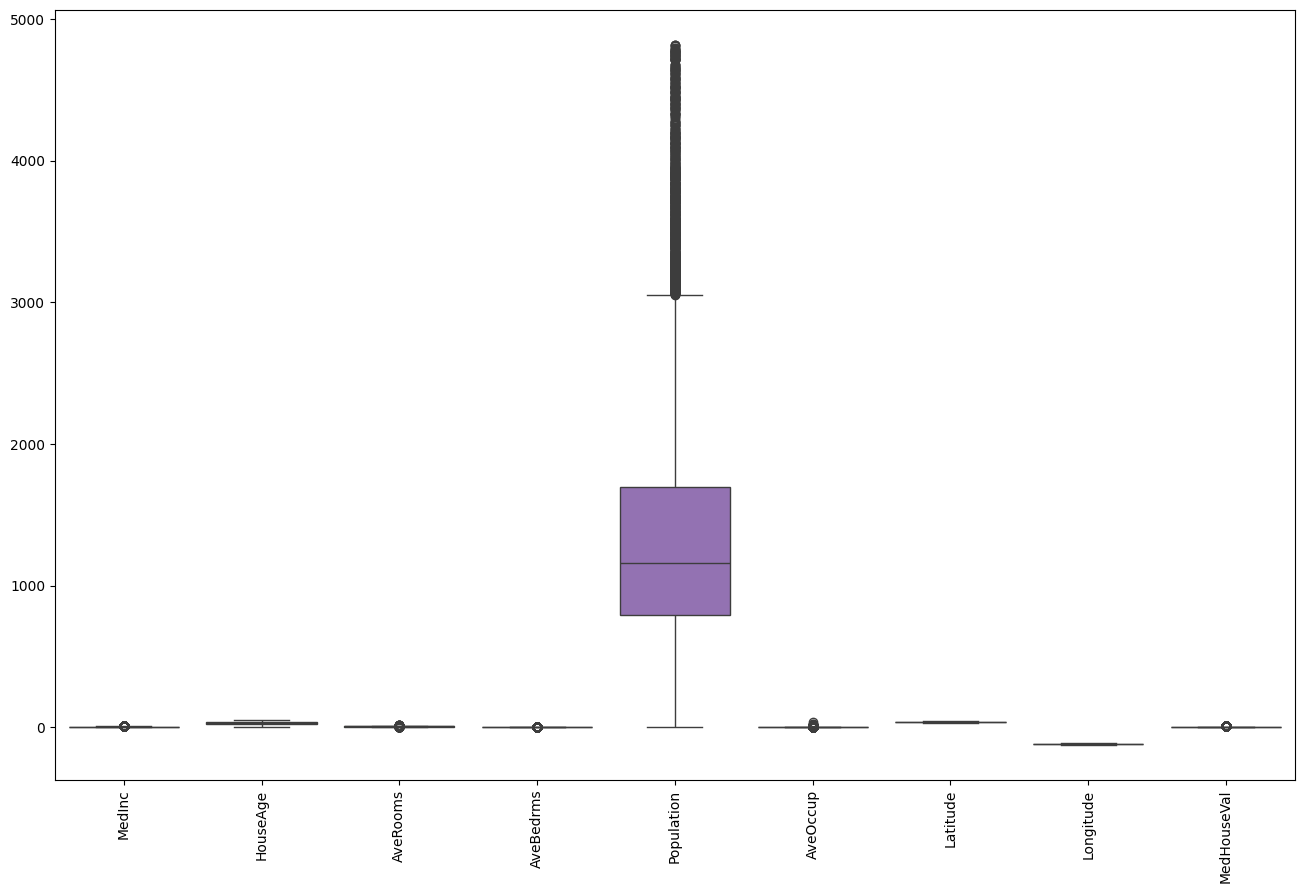

In [56]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=90)
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)


In [58]:
X_cleaned_train, X_cleaned_test, y_cleaned_train, y_cleaned_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42) 

In [64]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)


In [65]:
scaler_cleaner = StandardScaler()
X_scaled_cleaned_train = scaler_cleaner.fit_transform(X_cleaned_train)
X_scaled_cleaned_test = scaler_cleaner.transform(X_cleaned_test)

In [66]:
model = LinearRegression()
model.fit(X_scaled_train, y_train)

LinearRegression()

In [67]:
model_cleaned = LinearRegression()
model_cleaned.fit(X_scaled_cleaned_train, y_cleaned_train)

LinearRegression()

In [68]:
y_pred = model.predict(X_scaled_test)

In [69]:
y_cleaned_pred = model_cleaned.predict(X_scaled_cleaned_test)

In [72]:
print("Results with UNCLEANED Data")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Results with UNCLEANED Data
Mean Squared Error (MSE): 0.5558915986952441
Root Mean Squared Error (RMSE): 0.7455813830127762
Mean Absolute Error (MAE): 0.5332001304956565
R² Score: 0.575787706032451


In [73]:
print("Results with CLEANED Data")
print("Mean Squared Error (MSE):", mean_squared_error(y_cleaned_test, y_cleaned_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_cleaned_test, y_cleaned_pred)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_cleaned_test, y_cleaned_pred))
print("R² Score:", r2_score(y_cleaned_test, y_cleaned_pred))

Results with CLEANED Data
Mean Squared Error (MSE): 0.47310162544208195
Root Mean Squared Error (RMSE): 0.6878238331448554
Mean Absolute Error (MAE): 0.49875861046958575
R² Score: 0.6162271478185639
